## **Part-1**


***Question-1:***

  Write a regex to extract all the numbers with orange color background from the below text in italics.


*{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}*


In [ ]:
#import required libraries
import re

#given JSON is in dictionary, so convert it into string
data = str({"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]})

#initalize an empty array and add extracted numbers to the array
result = []

#extract all digits preceeded by white spaces and add them into result array
for num in re.findall('\s+(\d+)', data):
  result.append(num)

#print the result
print(result)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '648', '649', '650', '651', '652', '653', '3']




---



***Question-2:***

There are times when a user writes Good, Nice App or any other positive text, in the review and gives 1-star rating. Your goal is to identify the reviews where the semantics of review text does not match rating. 

Your goal is to identify such ratings where review text is good, but rating is negative- so that the support team can point this to users


[Live link](https://ratingreview.azurewebsites.net/)

In [ ]:
#install and import required libraries

import pickle as pkl
import numpy as np
import pandas as pd
import nltk
from sklearn.metrics import accuracy_score 
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#read the dataset and display it

review_data = pd.read_csv('/content/drive/MyDrive/Pradeep_Vajrala_NextLab_interview_solutions/chrome_reviews.csv')
review_data

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome
...,...,...,...,...,...,...,...,...,...,...
7199,684987,https://play.google.com/store/apps/details?id=...,Bagusss..,5,0,boima panjaitan,NaN,88.0.4324.93,2021-03-05,com.android.chrome
7200,684988,https://play.google.com/store/apps/details?id=...,Bad version 😔,1,0,निशान्त सिंह,NaN,88.0.4324.181,2021-03-05,com.android.chrome
7201,684989,https://play.google.com/store/apps/details?id=...,One thing that I have to say I can't spelled t...,5,0,Virgie Allen,NaN,89.0.4389.72,2021-03-05,com.android.chrome
7202,684990,https://play.google.com/store/apps/details?id=...,Excellent,5,0,Kazuo Guevarra,NaN,89.0.4389.72,2021-03-05,com.android.chrome


In [ ]:
#remove unwanted data and columns

data = review_data.drop(['Review URL', 'Thumbs Up', 'User Name', 'Developer Reply', 'Version', 'Review Date', 'App ID'], axis=1)
data

,ID,Text,Star
0,3886,This is very helpfull aap.,5
1,3887,Good,3
2,3888,Not able to update. Neither able to uninstall.,1
3,3889,Nice app,4
4,3890,Many unwanted ads,1
...,...,...,...
7199,684987,Bagusss..,5
7200,684988,Bad version 😔,1
7201,684989,One thing that I have to say I can't spelled t...,5
7202,684990,Excellent,5


In [ ]:
#Assign if the text is positive or negative based on star ratings
#if rating is equal or greater than 2, then assign it as positive, else negative

data['Review'] = data['Star'].apply(lambda x: 'Positive' if x >= 2 else 'Negative')
data.head()

,ID,Text,Star,Review
0,3886,This is very helpfull aap.,5,Positive
1,3887,Good,3,Positive
2,3888,Not able to update. Neither able to uninstall.,1,Negative
3,3889,Nice app,4,Positive
4,3890,Many unwanted ads,1,Negative


In [ ]:
#check the dataset for any null values, white spaces and other non-word characters which might affect the solution

redundant_data=re.findall('\W+',str(data['Text']))
redundant_data

['                              ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.\n',
 '                                                    ',
 '\n',
 '          ',
 ' ',
 ' ',
 ' ',
 '. ',
 ' ',
 ' ',
 ' ',
 '.\n',
 '                                                ',
 ' ',
 '\n',
 '                                       ',
 ' ',
 ' ',
 '\n                              ...                        \n',
 '                                            ',
 '..\n',
 '                                        ',
 ' ',
 ' 😔\n',
 '    ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 "'",
 ' ',
 ' ',
 '...\n',
 '                                            ',
 '\n',
 '    ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ...\n',
 ': ',
 ', ',
 ': ',
 ', ',
 ': ']

In [ ]:
#portstemmer algorithm is used to remove affixes of a given word, leaving only the main/root word


ps=PorterStemmer()

def cleaning_data(dataframe):
    corpus=[]
    for i in range(0,len(dataframe)):
        #remove non-word character data
        review=re.sub("[^a-zA-Z]"," ",str(dataframe['Text'][i]))
        #convert everything into lower case format
        review=review.lower()
        #split sentences into words
        review=review.split()
        #remove affixes
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        #join words back to form sentences
        review=' '.join(review)
        #list of reviews
        corpus.append(review)
      

    for i in range(len(corpus)):
        dataframe['Text'][i]=corpus[i]
        
    #remove any '' or NaN even after cleaning data initially
    value_nan = float("NaN")
    dataframe.replace("", value_nan, inplace=True)
    dataframe=dataframe.dropna()
    dataframe.reset_index(inplace=True)
    corpus=list(dataframe['Text'])
        
    return dataframe

In [ ]:
#clean the working data

data=cleaning_data(data)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,ID,Text,Star,Review
0,0,3886,helpful aap,5,Positive
1,1,3887,good,3,Positive
2,2,3888,abl updat neither abl uninstal,1,Negative
3,3,3889,nice app,4,Positive
4,4,3890,mani unwant ad,1,Negative


In [ ]:
#split data into dependent and independent values

X=data['Text'].values
y=data['Review'].values

#split data into testing and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
# Creating model for Logisticregression
from sklearn.linear_model import LogisticRegression
text_clf_Log = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clfLog', LogisticRegression())])
parameters_Log = {'vect__ngram_range': [(1, 1), (1, 2),(1,3)],'tfidf__use_idf': (True, False),
                  'clfLog__penalty':['l1','l2','elasticnet','none'],'clfLog__C':[1.0,1.5,2.0],
                  'clfLog__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'clfLog__multi_class':['ovr']}
LogisticRegression_classifier = GridSearchCV(text_clf_Log, parameters_Log, n_jobs=-1)
LogisticRegression_classifier = LogisticRegression_classifier.fit(X_train,y_train)

Logistic_model=LogisticRegression_classifier.best_estimator_
y_pred=Logistic_model.predict(X_test)

print("Test accuracy score : ",accuracy_score(y_test,y_pred)) 
print(LogisticRegression_classifier.best_score_)
print(LogisticRegression_classifier.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
810 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

Test accuracy score :  0.8374880153403643
0.8355907236663003
{'clfLog__C': 2.0, 'clfLog__multi_class': 'ovr', 'clfLog__penalty': 'l2', 'clfLog__solver': 'newton-cg', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 3)}


In [ ]:
#save the output in a pickle file for further use in creating a web application

classifier = LogisticRegression()

pkl_out = open("/content/chrome_reviews.pkl", "wb")
pkl.dump(classifier,pkl_out)
pkl_out.close()

**Creating a web application using StreamLit**

In [ ]:
!pip install ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ngrok: filename=ngrok-0.0.1-py3-none-any.whl size=3061 sha256=e6449603cbc4dc9877037ebd92b2d34b315a433b6bfe4a0d94ba84d41926cee6
  Stored in directory: /root/.cache/pip/wheels/b2/f2/1e/11e57b35a7c1ea622a4cff4d9622bebd373f6371f3b1728a00
Successfully built ngrok


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 31.4 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=84491bf279d4635b178027aec27dfe341ecbbdec70c21fb78bd85c8ce7e17da8
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 23.8 MB/s 
     |████████████████████████████████| 4.3 MB 25.5 MB/s 
     |████████████████████████████████| 181 kB 69.9 MB/s 
     |████████████████████████████████| 232 kB 71.6 MB/s 
     |████████████████████████████████| 111 kB 71.0 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 164 kB 74.1 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 133 kB 69.6 MB/s 
     |████████████████████████████████| 793 kB 65.7 MB/s 
     |████████████████████████████████| 132 kB 56.2 MB/s 
     |████████████████████████████████| 428 kB 50.7 MB/s 
     |████████████████████████████████| 381 kB 54.5 MB/s 
     |████████████████████████████████| 51 kB 7.6 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=90c32c636f

In [ ]:
%%writefile predict_reviews.py

#load the model
from pyexpat import model
from pyngrok import ngrok
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


pickle_in=open("chrome_reviews.pkl","rb")
model=pickle.load(pickle_in)
data = pd.read_csv('chrome_reviews.pkl')

# creating object for PorterStemmer
ps=PorterStemmer()


def Review_classification(dataframe):
	df=cleaning_data(dataframe)
	X=df['Text'].values
	y_pred=model.predict(X)
	return y_pred
    
# Writing method to clean data
def cleaning_data(data_set):
	corpus=[]
	for i in range(0,len(data_set)):
		# Removing all the words other than alphabet
		review=re.sub("[^a-zA-Z]"," ",str(data_set['Text'][i]))

		# Converting into lowercase
		review=review.lower()

		#Splitting review as words
		review=review.split()

		# Stemming
		review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

		# Joining words (making sentences with words stem)
		review=' '.join(review)

		# Making list of reviews
		corpus.append(review)
      
	# replacing processed reviews 
	for i in range(len(corpus)):
		data_set['Text'][i]=corpus[i]

	return data_set
    
PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.beta_set_page_config(**PAGE_CONFIG)

def main():
	st.title('App rating & review classifier')
	st.write('Identify the reviews where the semantics of review text does not match rating.')
	st.write('Upload a csv file of following format for using the app and click on Classify')
	st.write(data.head())
	
	html_temp="""
    <div style="background-color:tomato;padding:10px;">
    <h2 style="color:white;text-align:center;">App rating & review classifier</h2>
    </div>
    """
	st.markdown(html_temp,unsafe_allow_html=True)
	
	st.subheader("Upload CSV file to classify reviews")
	filename = st.file_uploader("Upload a file", type=("csv"))
	if filename is not None:
		try:
			if st.button('Classify'):
				test_data=pd.read_csv(filename)
				ref_data=test_data.copy(deep=True)
				y_pred=Review_classification(test_data)
				review_ID=[]
				for i in range(len(y_pred)):
					if ( (y_pred[i]==1)and (ref_data['Star'][i]<2)):
						review_ID.append(ref_data['ID'][i])
				result=ref_data[ref_data['ID'].isin(review_ID)]
				result.reset_index(inplace=True)
				result=result.iloc[:,1:]
				st.subheader('Classified Reviews')
				st.write('Reviews where the semantics of review text does not match rating.')				
				st.write(result)
		except:
			st.error('Please choose a file')
			
			
  
if __name__=='__main__':
	main()

Writing predict_reviews.py


In [ ]:
!python3 "/content/predict_reviews.py"

2022-06-30 14:57:53.183 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
Traceback (most recent call last):
  File "/content/predict_reviews.py", line 16, in <module>
    data = pd.read_csv('chrome_reviews.pkl')
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 586, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 482, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 811, in __init__
    self._engine = self._make_engine(self.engine)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 1040, in _make_engine
    return mapping[engine](self.f, **self.options)  # type: ignore[call-arg]
  File "/usr/local/lib/

In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://b4c1-35-247-164-23.ngrok.io" -> "http://localhost:80">



---



***Question 3:***

Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute. [Here's the dataset](https://drive.google.com/file/d/1yuDyU7EjJ8Nai83FDdIF2w4inm17NzBF/view?usp=sharing)

In [ ]:
#load required libraries

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load datasets

df = pd.read_csv('/content/drive/MyDrive/Pradeep_Vajrala_NextLab_interview_solutions/browser_rankings_data.csv')
df.head(100)

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,16/12/20,net.fast.web.browser,18/12/20,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,16/12/20,com.android.chrome,18/12/20,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,16/12/20,com.opera.browser,27/02/21,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,16/12/20,com.opera.browser,18/12/20,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,16/12/20,com.cloudmosa.puffinTV,07/02/21,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
...,...,...,...,...,...,...,...,...,...,...
95,246,privacy browsers for android,2.0,in,en,19/12/20,com.brave.browser,18/12/20,"Free, safe internet browser! Private browsing,...","Privately browse the internet, for free! The B..."
96,247,privacy browsers for android,1.0,in,en,19/12/20,com.duckduckgo.mobile.android,13/02/21,"Browse the web privately, search anonymously, ...",Tired of being tracked online? We can help. At...
97,247,privacy browsers for android,1.0,in,en,19/12/20,com.duckduckgo.mobile.android,18/12/20,"Browse the web privately, search anonymously, ...",Tired of being tracked online? We can help. At...
98,248,privacy browsers for android,84.0,in,en,19/12/20,com.vivaldi.browser,18/12/20,Fast &amp; private web browser with ad blocker...,Vivaldi is a new private web browser with an i...


In [ ]:
#remove null values from dataset to avoid any errors and miscalculations

print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(3066, 10)
(3050, 10)


In [ ]:
#drop unwanted columns from the dataset

df = df.drop(['ID', 'Country', 'Language', 'Date', 'Date of Last Description Change'], axis=1)
df.head()

,Keyword,Rank,App ID,Short Description,Long Description
0,browser,2.0,net.fast.web.browser,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,browser,3.0,com.android.chrome,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,browser,4.0,com.opera.browser,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,browser,4.0,com.opera.browser,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,browser,1.0,com.cloudmosa.puffinTV,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [ ]:
#add 2 new columns to the dataset, each representing length of short descriptions & long descriptions

df["Short Description Length"]= df["Short Description"].str.len()
df["Long Description Length"]= df["Long Description"].str.len()
df["Keyword Length"]= df["Keyword"].str.len()
df

,Keyword,Rank,App ID,Short Description,Long Description,Short Description Length,Long Description Length,Keyword Length
0,browser,2.0,net.fast.web.browser,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",80,1283,7
1,browser,3.0,com.android.chrome,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",79,2771,7
2,browser,4.0,com.opera.browser,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",84,3087,7
3,browser,4.0,com.opera.browser,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",84,3939,7
4,browser,1.0,com.cloudmosa.puffinTV,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,58,1437,7
...,...,...,...,...,...,...,...,...
3061,android browser,7.0,com.opera.browser,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",84,3939,15
3062,android browser,5.0,com.cloudmosa.puffinTV,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,58,1437,15
3063,android browser,5.0,com.cloudmosa.puffinTV,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,58,1687,15
3064,android browser,5.0,com.cloudmosa.puffinTV,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,59,1608,15


In [ ]:
#find correlation between short description length and long description length

df['Short Description Length'].corr(df['Long Description Length'])

0.7274942149074148

In [ ]:
#find correlation between short description length and rank of the application

df['Short Description Length'].corr(df['Rank'])

0.20893893175936484

In [ ]:
#find correlation between long description length and rank of the application

df['Rank'].corr(df['Long Description Length'])

0.36560006656824895

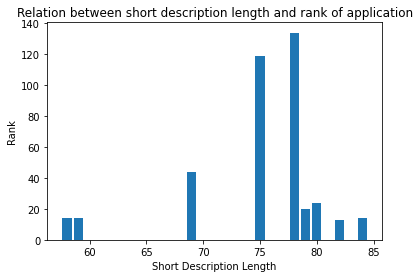

In [ ]:
#plot a graph between Short Description Length and Rank of application

plt.bar(df['Short Description Length'], df['Rank'])
plt.xlabel('Short Description Length')
plt.ylabel('Rank')
plt.title('Relation between short description length and rank of application')

plt.show()

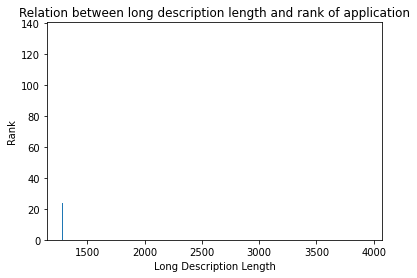

In [ ]:
#plot a graph between Short Description Length and Rank of application

plt.bar(df['Long Description Length'], df['Rank'])
plt.xlabel('Long Description Length')
plt.ylabel('Rank')
plt.title('Relation between long description length and rank of application')

plt.show()

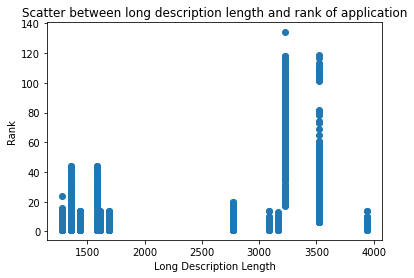

In [ ]:
#use a scatter plot for better understanding

plt.scatter(df['Long Description Length'], df['Rank'])
plt.xlabel('Long Description Length')
plt.ylabel('Rank')
plt.title('Scatter between long description length and rank of application')
plt.show()

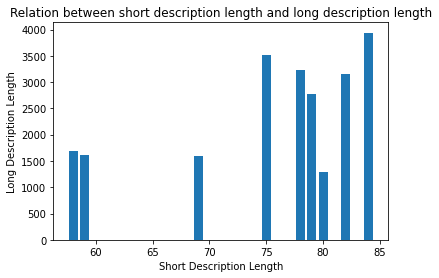

In [ ]:
#plot a graph between Short Description Length and Long Description Length

plt.bar(df['Short Description Length'], df['Long Description Length'])
plt.xlabel('Short Description Length')
plt.ylabel('Long Description Length')
plt.title('Relation between short description length and long description length')

plt.show()

In [ ]:
#sorting values for observing how keyword length affects the application ranking

df = df.sort_values(['Keyword Length', 'Rank'])
df.head()

,Keyword,Rank,App ID,Short Description,Long Description,Short Description Length,Long Description Length,Keyword Length
4,browser,1.0,com.cloudmosa.puffinTV,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,58,1437,7
5,browser,1.0,com.cloudmosa.puffinTV,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,58,1687,7
6,browser,1.0,com.cloudmosa.puffinTV,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,59,1608,7
7,browser,1.0,com.cloudmosa.puffinTV,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,59,1440,7
17,browser,1.0,com.opera.browser,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",84,3087,7


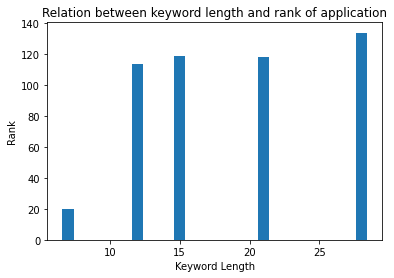

In [ ]:
#plot a graph between Keyword Length and Rank of application

plt.bar(df['Keyword Length'], df['Rank'])
plt.xlabel('Keyword Length')
plt.ylabel('Rank')
plt.title('Relation between keyword length and rank of application')

plt.show()

***Question-1***: Is there any correlation between short description, long description and ranking? Does the placement of keywords (for example - using a keyword in the first 10 words - have any correlation with the ranking)?

**Answer**

The function corr() is used to find correlation between columns in a dataset. Using this function for Short Description Length and Long Description Length, gives us a correlation of +0.7274 correlation. Which means, there is a strong correlation between the short and long description lengths.

All the numbers indicate total characters in the description, not words in description


*   Plotting a graph between these two also indicates the correlation. In most cases, longer the short description is, the longer the long description is given. 

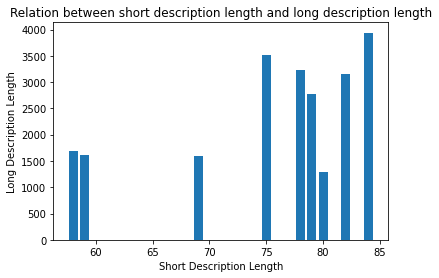

* Relation between short description length and ranking of application is also plotted, which suggested that not necessarily the shorter the length, better app ranking will be, but having keywords in the short description can help the app rank better by App Store Optimization(ASO)

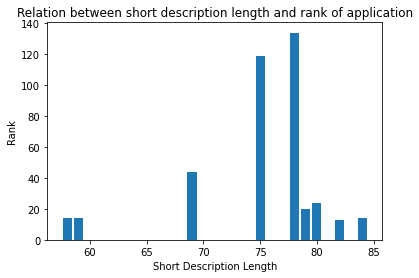

* Finally, relation between long description length and ranking of respective applications has also been plotted using a bar graph and also a scatter plot for better understanding. Though it does not mean longer the description, better the ranking, having keywords in the description helps it in better ranking at Search Engine Optimization(SEO)

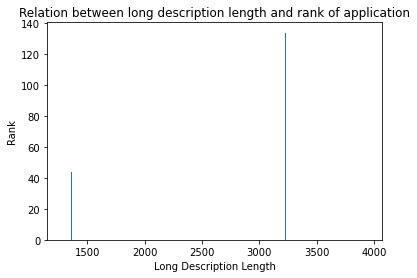

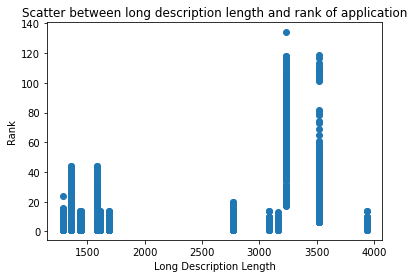




***Question-2:*** Does APP ID (Also known as package name) play any role in ranking?

**Answer**

Yes. It certainly does play a role in App Store Optimization(ASO) and Search Engine Optimization(SEO). APP ID is a keyword used for ranking apps in specific search query using words in the title/app name. APP ID has the biggest weight in ranking of application and having keywords in the first half of title is more important as they are visible to users and are not truncated or cut-off, so they play a major role in ranking. And also, using the exact title match for the search increases the ranking.

Also, in Google SEO, Exact Domain Match (EDM) plays an important role, meaning, having keywords in URL plays a direct role in better ranking of App.




***Question-3:*** Any other patterns or good questions that you can think of and answer?

**Answer**

One question I was interested in was how will the number of keywords affect the keyword ranking and overall ranking of the application?

For this, a new column of “Keyword Length” is added to the dataframe, and a bar plot is plotted to observe the results. We see that the lower the keyword length is, the higher the rank is. But it also refers that not just having any keyword would improve the search result. Keywords with higher keyword ranking help in better visibility of the app thus improving SEO and ASO.

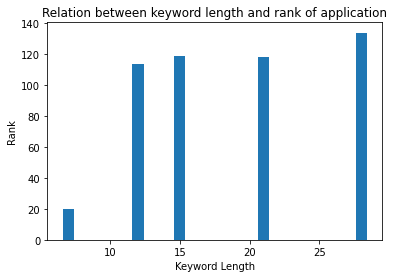

# Part-2

***Question-1***

Check if the sentence is Grammatically correct: Please use any pre-trained model or use text from open datasets. Once done, please evaluate the English Grammar in the text column of the below dataset. 

[Dataset](https://drive.google.com/file/d/1LTI5KNqPrtxrYRgJk2AxI30KgYyNcRpD/view?usp=sharing)

In [ ]:
#install and import required libraries

import pickle as pkl
import numpy as np
import pandas as pd
import nltk
from sklearn.metrics import accuracy_score 
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

df = pd.read_csv('/content/drive/MyDrive/Pradeep_Vajrala_NextLab_interview_solutions/review_data.csv')
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,star,app_id,reviewDate
0,Anathi Khanyile,5,com.fingersoft.hillclimb,18/03/21
1,Tony bahut funny hai Hill climbing racing my f...,5,com.fingersoft.hillclimb,18/03/21
2,Teturwu,1,com.fingersoft.hillclimb,18/03/21
3,Hoooooooooooyaaaaaaaaa what a game hoooooooooo...,5,com.fingersoft.hillclimb,18/03/21
4,This game is nice,5,com.fingersoft.hillclimb,18/03/21
...,...,...,...,...
29995,Plz my Vidos viral,5,video.like,21/03/21
29996,Nice,5,video.like,21/03/21
29997,Disturbing too much as YouTube ad,1,video.like,21/03/21
29998,Koub valo vai,5,video.like,21/03/21


In [ ]:
df=df.drop(['star', 'app_id', 'reviewDate'], axis=1)
df

,text
0,Anathi Khanyile
1,Tony bahut funny hai Hill climbing racing my f...
2,Teturwu
3,Hoooooooooooyaaaaaaaaa what a game hoooooooooo...
4,This game is nice
...,...
29995,Plz my Vidos viral
29996,Nice
29997,Disturbing too much as YouTube ad
29998,Koub valo vai


In [ ]:
redundant_data=re.findall('\W+',str(df['text']))
redundant_data

['                                          ',
 ' ',
 '\n',
 '        ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '...\n',
 '                                                  ',
 '\n',
 '        ',
 ' ',
 ' ',
 ' ',
 ' ',
 '...\n',
 '                                        ',
 ' ',
 ' ',
 ' ',
 '\n                               ...                        \n',
 '                                   ',
 ' ',
 ' ',
 ' ',
 '\n',
 '                                                 ',
 '\n',
 '                    ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 '                                        ',
 ' ',
 ' ',
 '\n',
 '                            ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 ': ',
 ', ',
 ': ',
 ', ',
 ': ']

In [ ]:
#portstemmer algorithm is used to remove affixes of a given word, leaving only the main/root word


ps=PorterStemmer()

def cleaning_data(dataframe):
    corpus=[]
    for i in range(0,len(dataframe)):
        #remove non-word character data
        review=re.sub("[^a-zA-Z]"," ",str(dataframe['text'][i]))
        #convert everything into lower case format
        review=review.lower()
        #split sentences into words
        review=review.split()
        #remove affixes
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        #join words back to form sentences
        review=' '.join(review)
        #list of reviews
        corpus.append(review)
      

    for i in range(len(corpus)):
        dataframe['text'][i]=corpus[i]
        
    #remove any '' or NaN even after cleaning data initially
    value_nan = float("NaN")
    dataframe.replace("", value_nan, inplace=True)
    dataframe=dataframe.dropna()
    dataframe.reset_index(inplace=True)
    corpus=list(dataframe['text'])
        
    return dataframe

In [ ]:
cleaning_data(df)
df

,text
0,anathi khanyil
1,toni bahut funni hai hill climb race favourit ...
2,teturwu
3,hoooooooooooyaaaaaaaaa game hooooooooooooyaaaa...
4,game nice
...,...
29995,plz vido viral
29996,nice
29997,disturb much youtub ad
29998,koub valo vai


In [ ]:
!pip install language_tool_python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
 
text = str(df['text'])
 
 
# get the matches
matches = tool.check(text)

Unzipping /tmp/tmpn69xupfy.zip to /root/.cache/language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.


In [ ]:
from csv import reader
my_mistakes = []
my_corrections = []
start_positions = []
end_positions = []
 
for rules in matches:
    if len(rules.replacements)>0:
        start_positions.append(rules.offset)
        end_positions.append(rules.errorLength+rules.offset)
        my_mistakes.append(text[rules.offset:rules.errorLength+rules.offset])
        my_corrections.append(rules.replacements[0])
     
 
     
my_new_text = list(text)
 
 
for m in range(len(start_positions)):
    for i in range(len(text)):
        my_new_text[start_positions[m]] = my_corrections[m]
        if (i>start_positions[m] and i<end_positions[m]):
            my_new_text[i]=""
     
my_new_text = "".join(my_new_text)
my_new_text

'0 anti Khalil\n1 Toni Beirut fungi HAI hill climb race favorite ...\n2 return\n3 hoooooooooooyaaaaaaaaa game hooooooooooooyaaaa...\n4 game nice\n                               ... \n29995 please video viral\n29996 nice\n29997 disturb much YouTube ad\n29998 KOB halo vie\n29999 want to grow account\nName: text, Length: 30000, type: object'



---

